In [1]:
import pandas as pd 
import seaborn as sns
import os
import numpy as np
pd.set_option('display.max_columns', None)


In [2]:
# classifying stock in OMX 30
# creating NN model to valuate the stock at the time of new report
# I have to include some macro data 
# maybe later include sentiment

In [ ]:
# load a sheetname year all 30 excel files as dataframe DF from a folder 'path' and name DF corresponding to the first letter untill the dash '-' ignoring a space ' ', also create a list containing all DF's names. 

In [45]:
path = 'OMX30/ABB-ABB.xlsx'

df_test = pd.read_excel(path, 'Year')
df2 = pd.read_excel(path, 'PriceDay')

In [2]:
# cleaning and transforming the import table
def cleanData(df):
    df = df.T
    df.columns = df.iloc[0].str.replace('/','_').str.replace(" ", "_").str.replace('-', '_').str.replace('%','pct').str.replace(' / ','_').str.replace(' - ', '_')
    df.columns = df.columns.str.replace('__','_').str.replace('___','_').str.replace('__','_')
    #strip and adjust column names 
    df = df.iloc[2:].drop(columns= np.nan).astype('float')
    return df

### Importing all stock data in list of dataframes

In [3]:

# Create an empty list to store the dataframes
df_list = []
df_names = []

# Set the path of the folder containing the excel files
path = 'OMX30/OMX30'

# Iterate over the excel files in the folder
for file in os.listdir(path):
    if file.endswith('.xlsx'):
        # Load the excel file as a dataframe
        df = pd.read_excel(os.path.join(path, file), sheet_name='Year')
        df = cleanData(df)
        # Get the name of the dataframe by splitting the file name at the '-'
        name = file.split("-")[0].replace(" ", "")
        # Append the dataframe to the list
        df_list.append(df)
        df_names.append(name)
# Print the list of dataframe names
print(df_names)

['SAND', 'GETIB', 'KINVB', 'SCAB', 'AZN', 'ABB', 'VOLVB', 'NDASE', 'TEL2B', 'SINCH', 'BOL', 'ATCOB', 'SHBA', 'SWEDA', 'ELUXB', 'SBBB', 'SEBA', 'INVEB', 'ALIVSDB', 'ERICB', 'ALFA', 'EVO', 'ATCOA', 'HMB', 'ERICB', 'TELIA', 'SKFB', 'NIBEB', 'HEXAB', 'ASSAB']


In [4]:
#creating a dict with tickers as keys and DF as values
omx_dict = {k:v for k,v in zip(df_names,df_list)}

In [5]:
print(f' pick the stock ticker as a key to omx_dict from the following: {df_names}')

 pick the stock ticker as a key to omx_dict from the following: ['SAND', 'GETIB', 'KINVB', 'SCAB', 'AZN', 'ABB', 'VOLVB', 'NDASE', 'TEL2B', 'SINCH', 'BOL', 'ATCOB', 'SHBA', 'SWEDA', 'ELUXB', 'SBBB', 'SEBA', 'INVEB', 'ALIVSDB', 'ERICB', 'ALFA', 'EVO', 'ATCOA', 'HMB', 'ERICB', 'TELIA', 'SKFB', 'NIBEB', 'HEXAB', 'ASSAB']


In [7]:
def calcCorr(df):
    # Calculate the correlation between the specific column and all other columns
    corr = df.corr()['Stock_Price_Average']
    # Sort the correlation values in descending order
    #df_corr = pd.DataFrame(corr.sort_values(ascending=False)
    return corr

In [8]:
# loop through the list or dictionary and apply corr function 
# create a new dataframe with correlations, columns = tickers, index= stock_metric

df_corr = pd.DataFrame()

for k in omx_dict:
    if df_corr.index.any():
        df_corr[k] =calcCorr(omx_dict[k])
    else:
        df_corr[k] = calcCorr(omx_dict[k])


In [148]:
df_corr.iloc[0:3,0:5]

,SAND,GETIB,KINVB,SCAB,AZN
Report,,,,,
Net_sales,0.606770,0.325934,-0.105851,-0.782908,0.914270
Gross_income,0.695119,0.600496,-0.108099,-0.612799,0.898463
Operating_income,0.669011,0.812204,0.855205,-0.463416,-0.440563


In [9]:
import plotly.express as px
fig = px.line(df_corr, color='variable', labels={'Report':'Report','value':'Value'}, title='Stock Ticker Comparison')
fig.show()

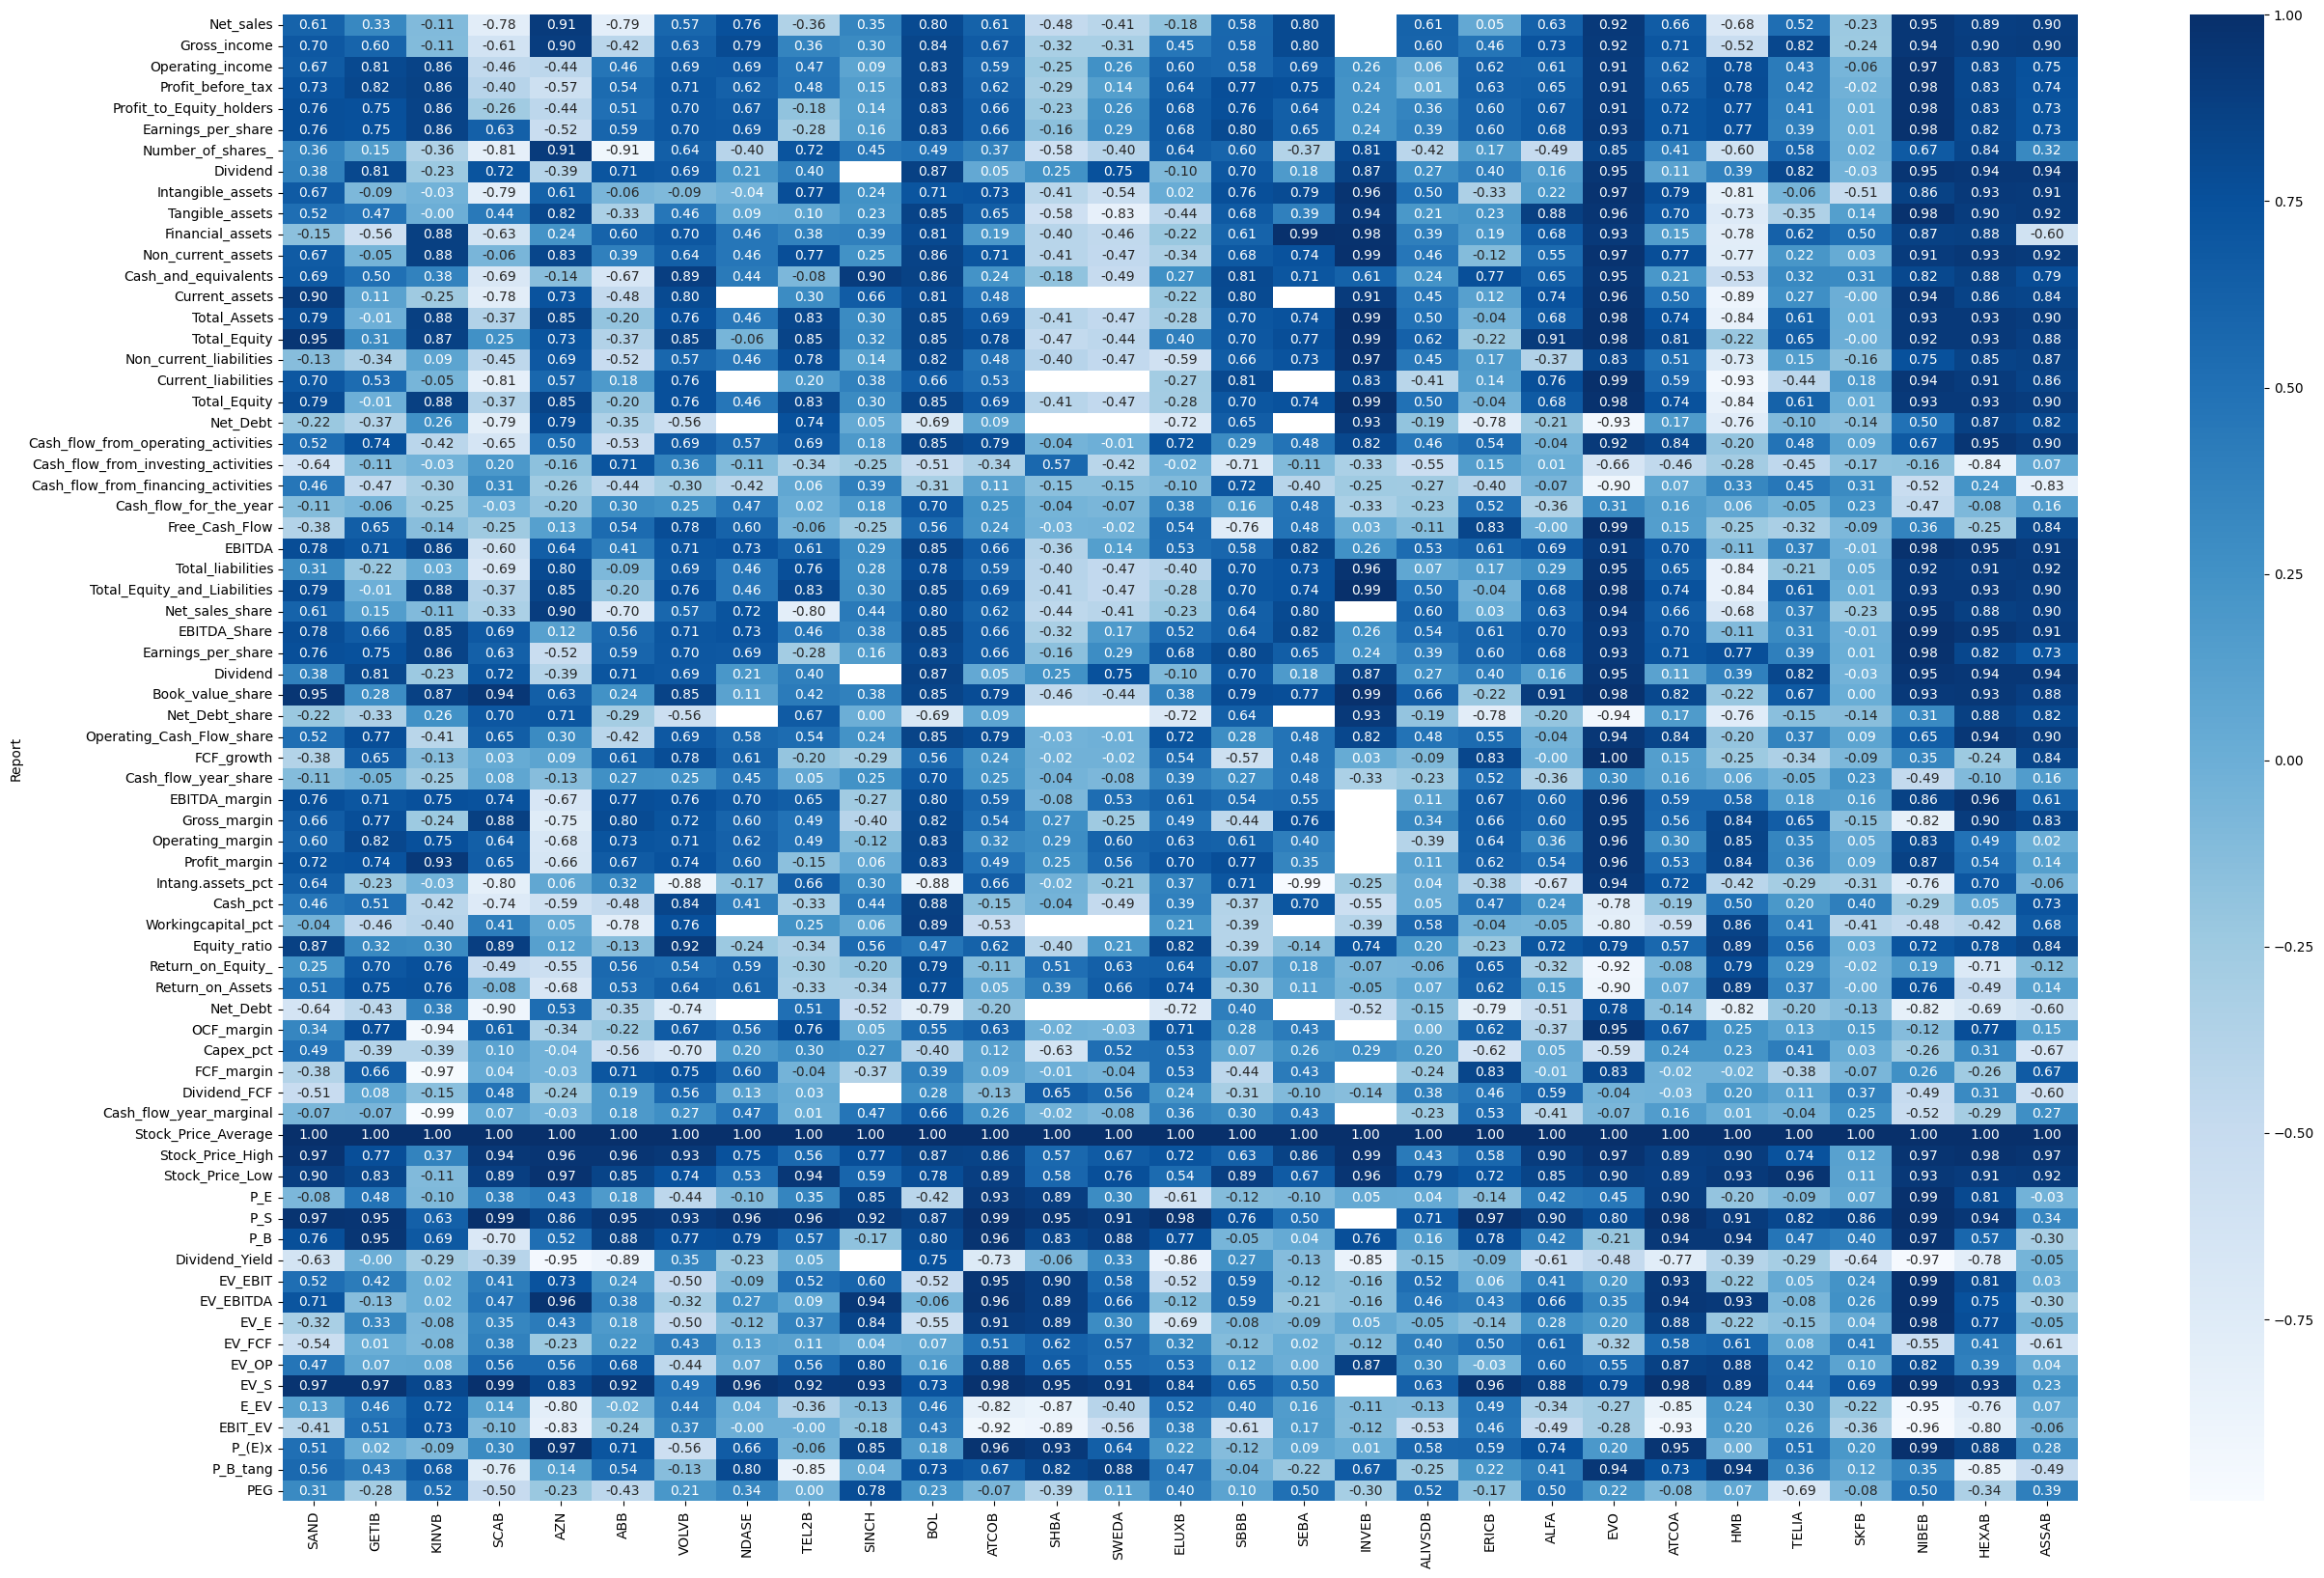

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))

# Create the heatmap
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='Blues')

# Add the ticker names as x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [13]:
#Lets check the similarity with K-means

In [21]:
# Import the necessary libraries
from sklearn.cluster import KMeans
import pandas as pd

# Load the data
data = df_corr.copy().T

# Select the features to use for the model
X = data.iloc[0:].fillna(0)

X.shape



(30, 71)

In [22]:
# Create the KMeans model
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster for each data point
predictions = kmeans.predict(X)

# Print the cluster for each data point
print(predictions)

[0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 2]


/home/siathor/Documents/DS_Bootcamp/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [23]:
df_corr['Clusters'] = predictions

ValueError: Length of values (30) does not match length of index (71)

In [20]:
df_corr['Clusters']

Report
Net_sales                   1
Gross_income                1
Operating_income            0
Profit_before_tax           0
Profit_to_Equity_holders    0
                           ..
E_EV                        2
EBIT_EV                     2
P_(E)x                      0
P_B_tang                    0
PEG                         2
Name: Clusters, Length: 71, dtype: int32